<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_4_DataPreprocessing_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **https://github.com/tarunlnmiit/machine_learning/blob/master/DataPreprocessing.csv**

## **Importing the libraries required for preprocessing from sklearn**
## **Importing the Dataset from the above link**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/DataPreprocessing.csv")
df.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


## **Use the necessary function to handling the missing data**



In [ ]:
print(df.isnull())
print(df.isnull().sum())

   Region    Age  Income  Online Shopper
0   False  False   False           False
1   False  False   False           False
2   False  False   False           False
3   False  False   False           False
4   False  False    True           False
5   False  False   False           False
6   False   True   False           False
7   False  False   False           False
8   False  False   False           False
9   False  False   False           False
Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64


In [ ]:
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data1=df.copy()
data1=imp.fit_transform(data1)
print(data1)

[['India' 49.0 86400.0 'No']
 ['Brazil' 32.0 57600.0 'Yes']
 ['USA' 35.0 64800.0 'No']
 ['Brazil' 43.0 73200.0 'No']
 ['USA' 45.0 57600.0 'Yes']
 ['India' 40.0 69600.0 'Yes']
 ['Brazil' 32.0 62400.0 'No']
 ['India' 53.0 94800.0 'Yes']
 ['USA' 55.0 99600.0 'No']
 ['India' 42.0 80400.0 'Yes']]


## **Use the necessary function for handling of categorical data if any**


In [ ]:
le = LabelEncoder()
df2 = df.copy()
df2['Online Shopper'] = le.fit_transform(df['Online Shopper'])

print(df2)

   Region   Age   Income  Online Shopper
0   India  49.0  86400.0               0
1  Brazil  32.0  57600.0               1
2     USA  35.0  64800.0               0
3  Brazil  43.0  73200.0               0
4     USA  45.0      NaN               1
5   India  40.0  69600.0               1
6  Brazil   NaN  62400.0               0
7   India  53.0  94800.0               1
8     USA  55.0  99600.0               0
9   India  42.0  80400.0               1


In [ ]:
from sklearn.preprocessing import OneHotEncoder  #one hot encoder, extra features , can use pandas Dummy also
encode = OneHotEncoder()

df3_arr = encode.fit_transform(df.iloc[:,3:4]).toarray()
df3_arr

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
data2 = pd.DataFrame(df3_arr,columns=['No','Yes'])
df[['No','Yes']] = data2
print(df)

   Region   Age   Income Online Shopper   No  Yes
0   India  49.0  86400.0             No  1.0  0.0
1  Brazil  32.0  57600.0            Yes  0.0  1.0
2     USA  35.0  64800.0             No  1.0  0.0
3  Brazil  43.0  73200.0             No  1.0  0.0
4     USA  45.0      NaN            Yes  0.0  1.0
5   India  40.0  69600.0            Yes  0.0  1.0
6  Brazil   NaN  62400.0             No  1.0  0.0
7   India  53.0  94800.0            Yes  0.0  1.0
8     USA  55.0  99600.0             No  1.0  0.0
9   India  42.0  80400.0            Yes  0.0  1.0


## **Perform feature Scaling**

In [ ]:
scale_df = pd.DataFrame(data1)
x = scale_df.values[:,1:-1]
y = scale_df.values[:,-1]
print(x)

[[49.0 86400.0]
 [32.0 57600.0]
 [35.0 64800.0]
 [43.0 73200.0]
 [45.0 57600.0]
 [40.0 69600.0]
 [32.0 62400.0]
 [53.0 94800.0]
 [55.0 99600.0]
 [42.0 80400.0]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x)
X_train = pd.DataFrame(X_train)
print(X_train)

          0         1
0  0.827340  0.820206
1 -1.370282 -1.188461
2 -0.982467 -0.686295
3  0.051709 -0.100433
4  0.310253 -1.188461
5 -0.336107 -0.351517
6 -1.370282 -0.853684
7  1.344428  1.406067
8  1.602972  1.740845
9 -0.077563  0.401733


## **Perform data visualizations using matplotlib or seaborn libraries.**

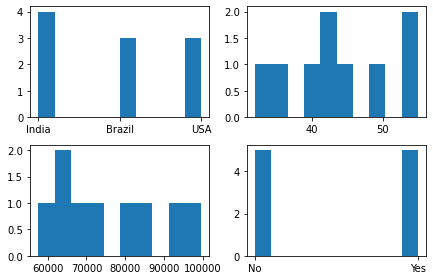

In [ ]:
plt.subplot(2,2,1)
plt.hist(df['Region'])
plt.subplot(2,2,2)
plt.hist(df['Age'])
plt.subplot(2,2,3)
plt.hist(df['Income'])
plt.subplot(2,2,4)
plt.hist(df['Online Shopper'])

plt.tight_layout()
plt.show()

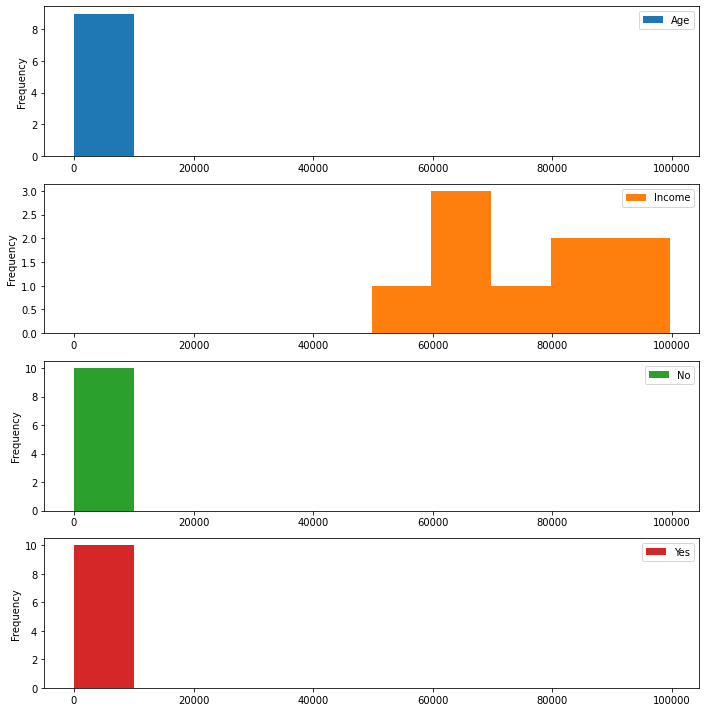

In [ ]:
df.plot(kind = 'hist',subplots=True,sharex = False,figsize = (10,10))

plt.tight_layout()
plt.show()

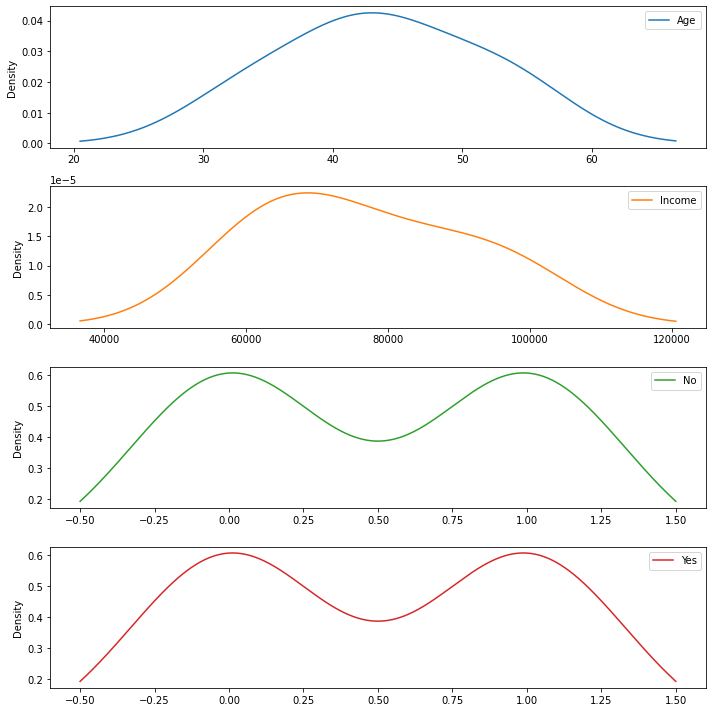

In [ ]:
df.plot(kind='density',subplots=True,sharex = False,figsize = (10,10))

plt.tight_layout()
plt.show()

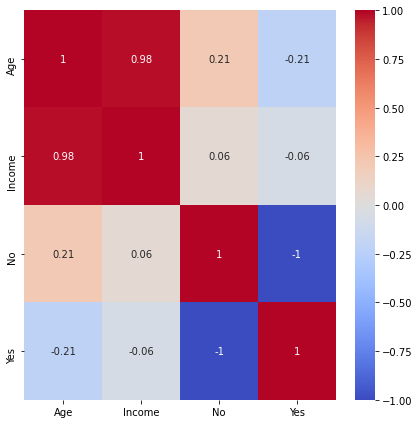

In [ ]:
corr = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap = "coolwarm")
plt.tight_layout()
plt.show()

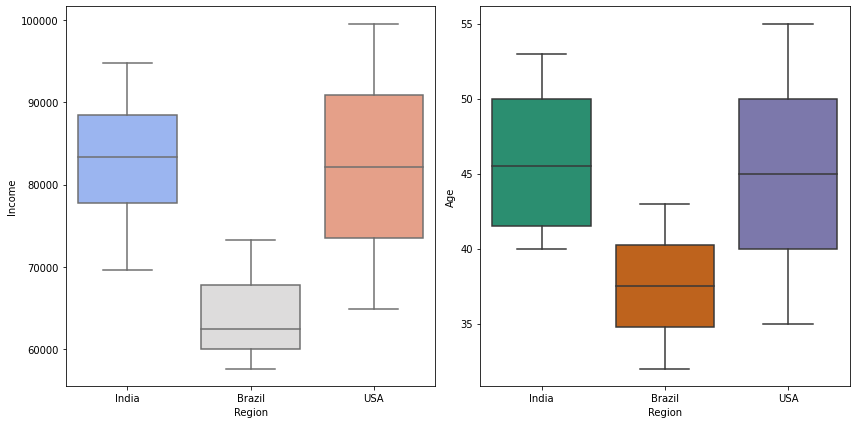

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x='Region',y='Income',data = df,palette='coolwarm')
plt.subplot(1,2,2)
sns.boxplot(x='Region',y='Age',data = df,palette='Dark2')

plt.tight_layout()
plt.show()

## **Splitting the dataset into training and testing datasets**

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(scale_df.values[:,:-1], scale_df.values[:,-1])
print('Training dataset of X - :')
print(Train_X)
print('Test dataset of X - :')
print(Test_X)

Training dataset of X - :
[['USA' 55.0 99600.0]
 ['USA' 45.0 57600.0]
 ['India' 40.0 69600.0]
 ['India' 49.0 86400.0]
 ['Brazil' 32.0 62400.0]
 ['USA' 35.0 64800.0]
 ['India' 42.0 80400.0]]
Test dataset of X - :
[['India' 53.0 94800.0]
 ['Brazil' 43.0 73200.0]
 ['Brazil' 32.0 57600.0]]


# **Importing and Reading the Dataset Movie_metadata**

In [ ]:
mf = pd.read_csv("movie_metadata.csv")
mf.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


## **Use the necessary function to handling the missing data (most-frequent here)**

In [ ]:
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
fill = mf.copy()
fill=imp.fit_transform(fill)
print(fill)

[['Color' 'James Cameron' 723.0 ... 7.9 1.78 33000]
 ['Color' 'Gore Verbinski' 302.0 ... 7.1 2.35 0]
 ['Color' 'Sam Mendes' 602.0 ... 6.8 2.35 85000]
 ...
 ['Color' 'Benjamin Roberds' 13.0 ... 6.3 2.35 16]
 ['Color' 'Daniel Hsia' 14.0 ... 6.3 2.35 660]
 ['Color' 'Jon Gunn' 43.0 ... 6.6 1.85 456]]


## **Perform data visualizations using matplotlib or seaborn libraries.**


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4671a6ed0>,
      dtype=object)

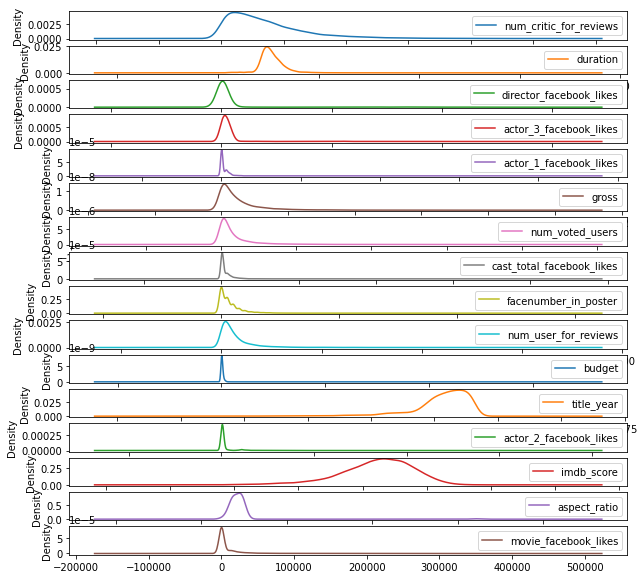

In [ ]:
mf.plot(kind='density',subplots=True,sharex = False,figsize = (10,10))

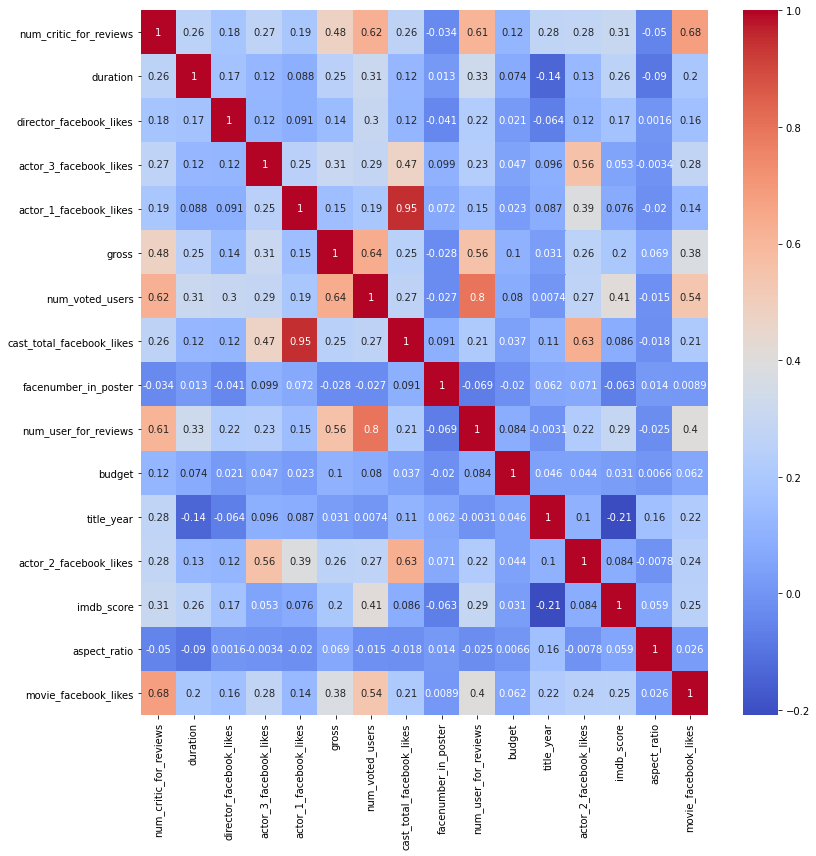

In [ ]:
cr = mf.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cr,annot=True,cmap = "coolwarm")
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

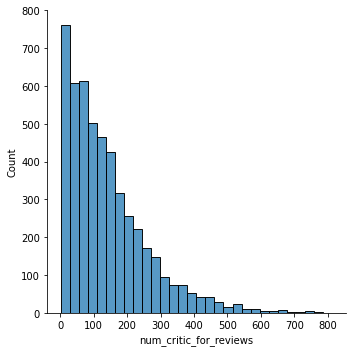

In [ ]:
plt.figure(figsize=(12,6))
sns.displot(mf['num_critic_for_reviews'],bins=30)
plt.tight_layout()
plt.show()

## **Use the necessary function for handling of categorical data if any** 

In [ ]:
data1new=mf.copy()
data1new=imp.fit_transform(data1new)
data_framenew=pd.DataFrame(data1new,columns=mf.columns)

In [ ]:
le=LabelEncoder()
dfnew=mf.copy()
ohenew=OneHotEncoder()
arrnew = ohenew.fit_transform(data_framenew.iloc[:,21:22]).toarray()
arrnew

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
columnsdata=['TV-G', 'R', 'TV-MA', 'G', 'Approved', 'TV-PG', 'PG', 'PG-13',    # CATEGORICAL COLUMN CONSIDERED AS CONTENT RATING
       'Not Rated', 'Unrated', 'TV-14', 'TV-Y', 'NC-17', 'X', 'TV-Y7',         #  SO BASED ON THAT HAVE ASSIGNED and added PG-13, and other colmns
       'GP', 'Passed', 'M'] 

data2new = pd.DataFrame(arrnew,columns=columnsdata)
mf[columnsdata]=data2new
mf

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,TV-G,R,TV-MA,G,Approved,TV-PG,PG,PG-13,Not Rated,Unrated,TV-14,TV-Y,NC-17,X,TV-Y7,GP,Passed,M
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Perform feature Scaling**

In [ ]:
cols = ["color","director_name","actor_2_name","genres","actor_1_name","movie_title","actor_3_name",
        "plot_keywords","movie_imdb_link","language","country","content_rating"]
str_remove_df = mf.drop(cols,axis=1) # HAVE TO REMOVE STRING COLUMNS FOR FURTHER SCALING
str_remove_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,TV-G,R,TV-MA,G,Approved,TV-PG,PG,PG-13,Not Rated,Unrated,TV-14,TV-Y,NC-17,X,TV-Y7,GP,Passed,M
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,637.0,NaN,629,2283,2.0,6.0,NaN,2013.0,470.0,7.7,NaN,84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5039,43.0,43.0,NaN,319.0,841.0,NaN,73839,1753,1.0,359.0,NaN,NaN,593.0,7.5,16.00,32000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5040,13.0,76.0,0.0,0.0,0.0,NaN,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,NaN,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,NaN,2012.0,719.0,6.3,2.35,660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#scale_df2 = pd.DataFrame(fill)
x = str_remove_df.values[:,:-1]
y = str_remove_df.values[:,-1]
print(x)

[[723. 178.   0. ...   0.   0.   0.]
 [302. 169. 563. ...   0.   0.   0.]
 [602. 148.   0. ...   0.   0.   0.]
 ...
 [ 13.  76.   0. ...   0.   0.   0.]
 [ 14. 100.   0. ...   0.   0.   0.]
 [ 43.  90.  16. ...   0.   0.   0.]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
X_train = sc2.fit_transform(x)
X_train = pd.DataFrame(X_train)
print(X_train)

            0         1         2   ...        30        31        32
0     4.793224  2.810046 -0.244045  ... -0.014083 -0.014083 -0.111567
1     1.330754  2.452831 -0.043906  ... -0.014083 -0.014083 -0.111567
2     3.798073  1.619330 -0.244045  ... -0.014083 -0.014083 -0.111567
3     5.533420  2.254379  7.576665  ... -0.014083 -0.014083 -0.111567
4          NaN       NaN -0.197476  ... -0.014083 -0.014083 -0.111567
...        ...       ...       ...  ...       ...       ...       ...
5038 -1.144789 -0.801791 -0.243334  ... -0.014083 -0.014083 -0.111567
5039 -0.799364 -2.548174       NaN  ... -0.014083 -0.014083 -0.111567
5040 -1.046096 -1.238387 -0.244045  ... -0.014083 -0.014083 -0.111567
5041 -1.037871 -0.285814 -0.244045  ... -0.014083 -0.014083 -0.111567
5042 -0.799364 -0.682720 -0.238357  ... -0.014083 -0.014083 -0.111567

[5043 rows x 33 columns]


# **Splitting the dataset into training and testing datasets**

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(str_remove_df.values[:,:-1], str_remove_df.values[:,-1])
print('Training dataset of X - :')
print(Train_X)
print(Train_X)
print("______________________________________________________________________________________________________")
print('Test dataset of X - :')
print(Test_X)

Training dataset of X - :
[[  6.  90.  15. ...   0.   0.   0.]
 [  1.  nan   4. ...   0.   0.   0.]
 [ 42. 146. 174. ...   0.   0.   0.]
 ...
 [136. 111.  17. ...   0.   0.   0.]
 [  5.  60.  nan ...   0.   0.   0.]
 [ 78. 104.   0. ...   0.   0.   0.]]
[[  6.  90.  15. ...   0.   0.   0.]
 [  1.  nan   4. ...   0.   0.   0.]
 [ 42. 146. 174. ...   0.   0.   0.]
 ...
 [136. 111.  17. ...   0.   0.   0.]
 [  5.  60.  nan ...   0.   0.   0.]
 [ 78. 104.   0. ...   0.   0.   0.]]
______________________________________________________________________________________________________
Test dataset of X - :
[[  1.  34.  19. ...   0.   0.   0.]
 [ 32. 144.  54. ...   0.   0.   1.]
 [160. 184.  34. ...   0.   0.   0.]
 ...
 [ 39. 108.  60. ...   0.   0.   0.]
 [ 26. 124.  42. ...   0.   0.   0.]
 [ 97. 125.   0. ...   0.   0.   0.]]
